# Solutions Homework 6

In this homework we will
1. Use `sklearn`'s **`SVC`** class to perform non-linear SVM classification 
2. Use `sklearn`'s `cross_val_score` and `GridSearchCV` functions to perform cross validation and hyper-parameter tunning.
3. Reconstruct the classification boundary given  `sklearn`  provide support vectors. 


## Preliminaries

### Imports

<div class="alert alert-block alert-info"> Problem 0 </div>
This time you will need to add the necesary import statements yourself.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import  SVC
from sklearn.model_selection import cross_val_score,GridSearchCV
%matplotlib inline

import sys
sys.path.append("../..")
import E4525_ML.samples as samples
import E4525_ML.plots as plots

### Random Seed

In [2]:
seed=4543
np.random.seed(seed)

### Sample Data Generation

In [3]:
N=40
X,Y=samples.ellipsoid(N//2)
X_test,Y_test=samples.ellipsoid(N//2)

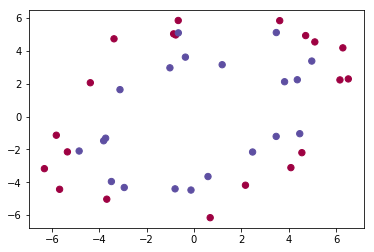

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y, s=40, cmap=plt.cm.Spectral)

## Polinomial features

<div class="alert alert-block alert-info"> Problem 1.0 </div>
Greate a function **`phi`**, that, given input $ N\times 2$ array $X$ generates  $N \times 5$ array $Z$
with all monomials in $X$ at to second order, i.e. with the  columns

$$
        X_1, X_2, X_1^2, X_1 X_2, X_2^2
$$


In [5]:
def phi(X):
   Z=np.c_[ X[:,0],X[:,1],X[:,0]**2,X[:,0]*X[:,1],X[:,1]**2]
   return Z

<div class="alert alert-block alert-info"> Problem 1.1 </div>
Generate feature arrays `Z` and `Z_test` with all monomial at to second order for the training data `X` and the test data `X_test` 

In [6]:
Z=phi(X)
Z_test=phi(X_test)
Z.shape,Z_test.shape

((40, 5), (40, 5))

## Linear SVM

In [7]:
K=10

<div class="alert alert-block alert-info"> Problem 2.0 </div>
using `sklearn`'s  function `model_validation.cross_val_score` and `sklearn`'s `svm.SVC` estimator (classifier) compute the average 10-Fold cross validation error of a **linear** svm model fitted to the transformed feature data `Z`.

[HINT] You need to import any `sklearn` modules or functions you want use.

In [8]:
model=SVC(kernel="linear")
scores=cross_val_score(model,Z,Y,cv=K)
np.mean(scores)

0.9

<div class="alert alert-block alert-info"> Problem 2.1 </div>
fit the SVC estimator to the transformed training data `Z`.
After fitting the model, compute the number of support vectors

[HINT] After fitting, Support vectors are stored into the model's variable `support_vectors_`.

Look into [SVC documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), specially the **Attributes** section  for information on available results returned by the classifier.

In [9]:
model.fit(Z,Y)
len(model.support_vectors_)

8

<div class="alert alert-block alert-info"> Problem 2.2 </div>
Show that the fitted estimator contains a variable `C` with the value of $C$ it was initialized with 

In [10]:
model.C

1.0

<div class="alert alert-block alert-info"> Problem 2.3 </div>
Using the function [`model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)
select by 10-fold cross validation the optimal value of C to use while fitting a  SVC linear model with the transformed training data `Z`.

Display clearly the optimal value of C, and the number of support vectors of the best model

[HINT] 

1. Read the  [`model_selection.GridSearchCV` ](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)        documentation carefully
2. Parameters to search over are passed in the `parameters`'s  **dictionary**   argument of `GridSearchCV`
3. The number of folds is controled by the argument  `cv`
4. Consider only the values of $C$ provided below
5. The GridSearchCV object, after fitting, contains a variable **`best_estimator_`** with the best calibrated model. You can get 
   from the best estimator $C$ and the array of support vectors.

In [11]:
Cs=[0.001,0.01,0.1,1,10,100,1000,10000]

In [12]:
parameters = {'C':Cs}

In [13]:
gmodel=GridSearchCV(model,parameters,cv=K)

In [14]:
gmodel.fit(Z,Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
best_model=gmodel.best_estimator_

In [16]:
best_model.C

0.1

In [17]:
len(best_model.support_vectors_)

9

<div class="alert alert-block alert-info"> Problem 2.4 </div>
Compute the 10-fold cross validation accuracy of the best estimator

In [18]:
scores=cross_val_score(best_model,Z,Y,cv=K)
np.mean(scores)

0.95

<div class="alert alert-block alert-info"> Problem 2.5 </div>
Show the class Y for each support vector

[HINT] after fitting the estimator  contains an boolean array `support_` that is set true for the index of data points that are support vectors

In [19]:
y_support=Y[best_model.support_]
len(y_support),y_support

(9, array([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=uint8))

<div class="alert alert-block alert-info"> Problem 2.6 </div>
Show that
$$
    \sum_i \alpha_i y_i =0
$$
where $y_i=-1$ for the negative class and $y_i=+1$ for the positive class
[HINT] 
1. Our input classes are y={0,1}, but `SVC` internally treats them as if they were y=(-1,1)
2. The fitted estimator contains an array **`dual_coef_`** that contains the values of $\alpha_i y_i$ for each $i$
3. `dual_coef_` is a $1 x N$ array, it may be easier for the rest of this notebook to turn in into a $N$ array by using
    `ravel()` method.


In [20]:
alpha=best_model.dual_coef_ 
alpha=alpha.ravel()
alpha

array([-0.0745366 , -0.03340815, -0.1       , -0.09613701, -0.02785635,
        0.03193811,  0.1       ,  0.1       ,  0.1       ])

In [21]:
np.sum(alpha)

2.7755575615628914e-17

<div class="alert alert-block alert-info"> Problem 2.7 </div>
Show which support vectors are in violation of the margin

[HINT]
Remember that support vectors in violation of the margin satisfy
$$
    \alpha_i = C
$$
But that `SVC` returned 

$$
    \textrm{dual_coef}_i = \alpha_i y_i
$$

In [22]:
violations= np.abs(alpha)==best_model.C
print(violations)

[False False  True False False False  True  True  True]


In [23]:
best_model.support_vectors_[violations]

array([[-0.76763744,  4.96832361,  0.58926724, -3.81387121, 24.68423951],
       [ 3.4780773 ,  5.11548949, 12.09702169, 17.79206787, 26.16823275],
       [-0.65807057,  5.09593951,  0.43305688, -3.35348784, 25.96859946],
       [-4.84612403, -2.10143256, 23.48491814, 10.18380284,  4.41601881]])

<div class="alert alert-block alert-info"> Problem 2.8 </div>
Using equation
$$
    w_d = \sum_i \alpha_i y_i x_{i,d}
$$
compute the vector of loadings $w$

In [24]:
w=np.dot(best_model.support_vectors_.T,alpha)
w

array([ 0.14682956,  0.06861315, -0.37866999,  0.25213885, -0.37136477])

<div class="alert alert-block alert-info"> Problem 2.9 </div>
Select a support vector not in violation of the margin and use the equation

$$
    y_i(w^T x + b) =1
$$
to compute $b$

In [25]:
v=best_model.support_vectors_[0]
v

array([ 4.71747825,  4.93114745, 22.25460101, 23.26258084, 24.3162152 ])

In [26]:
b=-1- np.dot(w.T,v)

In [27]:
b

9.560927983540665

In [28]:
np.dot(w.T,v)+b

-1.0

<div class="alert alert-block alert-info"> Problem 2.10 </div>
Write a prediction function that classifies poinst as having class $y=0$ or $y=1$ in terms of $w$ and $b$

Use this class to classify all points in the training set and verify that the accuracy of your function is exactly the same as  the
accuracy of the `predict` method of the best estimator.

In [29]:
def prediction(x,w,b):
        return (np.sign(np.dot(x,w)+b)+1)/2

In [30]:
Y_pred=prediction(Z,w,b)

In [31]:
np.mean(Y_pred==Y)

0.975

In [32]:
Y_pred=best_model.predict(Z)
np.mean(Y_pred==Y)

0.975

<div class="alert alert-block alert-info"> Problem 2.11 </div>
Test the best estimator accuracy on the transformed test data `Z_test`, `Y_test`

In [33]:
Y_pred=best_model.predict(Z_test)
np.mean(Y_pred==Y_test)

0.9

## Polinomial Kernel

<div class="alert alert-block alert-info"> Problem 3.1 </div>
using sklearn's function model_validation.cross_val_score and sklearn's svm.SVC estimator (classifier) compute the average 10-Fold cross validation error of a linear svm model to the **polinomial** kernel and the **untransformed** training data $X$,$Y.

Set the polinomial kernel to be
$$
    K(x,x') = (1 + x^T x')^2
$$

[HINT] 
1. `SVC` implement the following parametrization of the polynomial kernel
$$
    K(x,x') = ( c + \gamma x^T x')^d
$$
where $c$ is the parameter `coef0` of `SVC`'s constructor and $\gamma$ is the `gamma` parameter, and $d$ is the `degree` parameter.

2. You may want to review again the [SVC documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) 

In [34]:
model=SVC(kernel="poly",coef0=1,degree=2,gamma=1)

In [35]:
scores=cross_val_score(model,X,Y,cv=K)
np.mean(scores)

0.9

<div class="alert alert-block alert-info"> Problem 3.2 </div>
Using the function [`model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)
select by 10-fold cross validation the optimal values of $C$ and $\gamma$ to use while fitting a  SVC polynomial kernel with the untransformed training data `X`. Keep the constant $c$ (`coef0`) fixed at 1.

Display clearly the optimal values of $C$ and $\gamma$, and the number of support vectors of the best model

[HINT] 

1. Read the  [`model_selection.GridSearchCV` ](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)        documentation carefully
2. Parameters to search over are passed in the `parameters`'s  **dictionary**   argument of `GridSearchCV`
3. The number of folds is controled by the argument  `cv`
4. Consider only the values of $C$ and $\gamma$ provided below
5. The GridSearchCV object, after fitting, contains a variable **`best_estimator_`** with the best calibrated model. You can get 
   from the values of best estimator's $C$  and $\gamma$ parameters and the array of support vectors.
6. As the search may be a bit time consuming, it may be useful so set the `GridSearchCV` verbose parameter so that you can see if the search is making progress.

In [36]:
Cs=[0.001,0.01,0.1,1,10,100]
gammas=[0.01,0.1,1,10,100]

In [37]:
parameters = {'C':Cs,'gamma':gammas}

In [38]:
gmodel=GridSearchCV(model,parameters,cv=K,verbose=2)

In [39]:
gmodel.fit(X,Y)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............................. C=0.001, gamma=0.01, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............................. C=0.001, gamma=0.01, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............................. C=0.001, gamma=0.01, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............................. C=0.001, gamma=0.01, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............................. C=0.001, gamma=0.01, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............................. C=0.001, gamma=0.01, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] ................................. C=0.01, gamma=10, total=   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] ................................. C=0.01, gamma=10, total=   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] ................................. C=0.01, gamma=10, total=   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] ................................. C=0.01, gamma=10, total=   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] ................................. C=0.01, gamma=10, total=   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] ................................. C=0.01, gamma=10, total=   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] .

[CV] ................................. C=0.1, gamma=100, total=   0.3s
[CV] C=0.1, gamma=100 ................................................
[CV] ................................. C=0.1, gamma=100, total=   0.1s
[CV] C=0.1, gamma=100 ................................................
[CV] ................................. C=0.1, gamma=100, total=   0.3s
[CV] C=0.1, gamma=100 ................................................
[CV] ................................. C=0.1, gamma=100, total=   0.0s
[CV] C=0.1, gamma=100 ................................................
[CV] ................................. C=0.1, gamma=100, total=   0.1s
[CV] C=0.1, gamma=100 ................................................
[CV] ................................. C=0.1, gamma=100, total=   0.1s
[CV] C=0.1, gamma=100 ................................................
[CV] ................................. C=0.1, gamma=100, total=   0.1s
[CV] C=0.1, gamma=100 ................................................
[CV] .

[CV] ................................... C=1, gamma=100, total=   0.1s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .

[CV] .................................. C=100, gamma=10, total=   0.3s
[CV] C=100, gamma=10 .................................................
[CV] .................................. C=100, gamma=10, total=   4.6s
[CV] C=100, gamma=10 .................................................
[CV] .................................. C=100, gamma=10, total=   5.7s
[CV] C=100, gamma=10 .................................................
[CV] .................................. C=100, gamma=10, total=   8.4s
[CV] C=100, gamma=10 .................................................
[CV] .................................. C=100, gamma=10, total=   0.0s
[CV] C=100, gamma=10 .................................................
[CV] .................................. C=100, gamma=10, total=   7.2s
[CV] C=100, gamma=10 .................................................
[CV] .................................. C=100, gamma=10, total=   7.0s
[CV] C=100, gamma=10 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.4min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=2, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [40]:
best_model=gmodel.best_estimator_

In [41]:
best_model.fit(X,Y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=2, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
best_model.C,best_model.gamma

(0.1, 1)

<div class="alert alert-block alert-info"> Problem 3.3 </div>
Show the class Y for each support vector

[HINT] after fitting the estimator  contains an boolean array `support_` that is set true for the index of data points that are support vectors

In [43]:
y_support=Y[best_model.support_]
len(y_support),y_support

(10, array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=uint8))

<div class="alert alert-block alert-info"> Problem 3.4 </div>
Show that
$$
    \sum_i \alpha_i y_i =0
$$
where $y_i=-1$ for the negative class and $y_i=+1$ for the positive class


In [44]:
alpha=best_model.dual_coef_ 
alpha=alpha.ravel()
alpha

array([-0.07854528, -0.03283008, -0.1       , -0.08723803, -0.00468167,
       -0.01974796,  0.02304301,  0.1       ,  0.1       ,  0.1       ])

In [45]:
alpha.sum()

-1.1102230246251565e-16

<div class="alert alert-block alert-info"> Problem 3.5 </div>
Show which support vectors are in violation of the margin


In [46]:
violations= np.abs(alpha)==best_model.C
print(violations)

[False False  True False False False False  True  True  True]


In [47]:
best_model.support_vectors_[violations]

array([[-0.76763744,  4.96832361],
       [ 3.4780773 ,  5.11548949],
       [-0.65807057,  5.09593951],
       [-4.84612403, -2.10143256]])

<div class="alert alert-block alert-info"> Problem 3.6 </div>
Write a function that, give two matrices $X_{i,d}$, $X'_{j,d}$ for $i=1,\dots,N_1$, $j=1,\dots,N_2$ and $d=1,\dots D$
computes the kernel products
$$
    K_{i,j} = \textrm{kernel}(X_i,X'_j)
$$
where 'kernel' is the optimal kernel you found by cross-validation

In [48]:
def kernel(x1,x2,gamma=best_model.gamma):
    return (gamma*np.dot(x1,x2.T)+1)**2

Select a support vector $x_i$ not in violation of the margin and use the equation

$$
y_i (\sum_j \alpha_j K(x_j,x_i)+b)=1 
$$
to compute $b$ 

[HINT] The `kernel` function you wrote before can be used for this.

In [49]:
v=best_model.support_vectors_[0]
v=v.reshape(1,len(v))

In [50]:
b=-1-np.dot(alpha,kernel(best_model.support_vectors_,v))
b

array([10.4469308])

<div class="alert alert-block alert-info"> Problem 3.7 </div>
Write a prediction function that classifies points as having class $y=0$ or $y=1$ in terms of $\alpha$, $b$, and the support vectors, using equation

$$
  y(x) =  \frac{\textrm{sign}( \sum_i \alpha_i y_i K(x,x_i) + b ) + 1}{2}
$$

Use this class to classify all points in the training set and verify that the accuracy of your function is exactly the same as  the
accuracy of the `predict` method of the best estimator.

In [51]:
def prediction(x,support_vectors,alpha,b):
    p=np.dot(alpha,kernel(support_vectors,x))
    return (np.sign(p+b)+1)/2

In [52]:
Y_pred=prediction(X,best_model.support_vectors_,alpha,b)
np.mean(Y_pred==Y)

0.975

In [53]:
Y_pred=best_model.predict(X)
np.mean(Y_pred==Y)

0.975

<div class="alert alert-block alert-info"> Problem 3.8 </div>
Use the function `decision_boundary_2d` from the python module `E4525_ML.plots` to display a graph of the training points and 
the optimal estimator descision boundary.

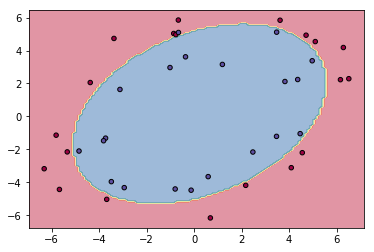

In [54]:
fig=plt.figure()
ax=fig.gca()
plots.decision_boundary_2d(best_model,X,Y,ax)

<div class="alert alert-block alert-info"> Problem 3.9 </div>
Test the best estimator accuracy on the test data `X_test`, `Y_test`

In [55]:
Y_pred=best_model.predict(X_test)
np.mean(Y_pred==Y)

0.875